In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/base-model/__results__.html
/kaggle/input/base-model/epoch1_final.csv
/kaggle/input/base-model/__notebook__.ipynb
/kaggle/input/base-model/__output__.json
/kaggle/input/base-model/epoch1.csv
/kaggle/input/base-model/custom.css
/kaggle/input/convolve-epoch1/sample_submission.csv
/kaggle/input/convolve-epoch1/train.json
/kaggle/input/convolve-epoch1/test.csv


In [2]:
plt.rcParams["figure.figsize"] = (18,10)

In [3]:
data = pd.read_csv("/kaggle/input/base-model/epoch1_final.csv")

In [4]:
data["time"][0]

'2005-06-03-15.42.50.363779'

In [5]:
data["time"] = pd.to_datetime(data["time"],format='%Y-%m-%d-%H.%M.%S.%f')

In [6]:
data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day
data["hour"] = data["time"].dt.hour
data["minute"] = data["time"].dt.minute
data["second"] = data["time"].dt.second

In [7]:
data["microsecond"] = data["time"].dt.microsecond

<AxesSubplot:xlabel='day', ylabel='count'>

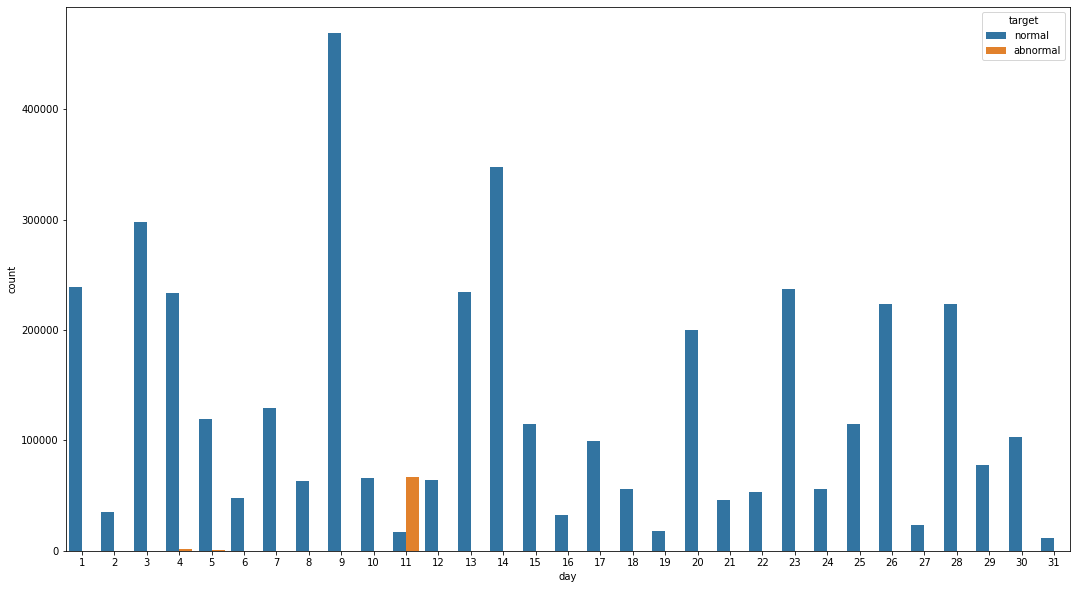

In [8]:
sns.countplot(x="day", data=data, hue="target")

(0.0, 20.0)

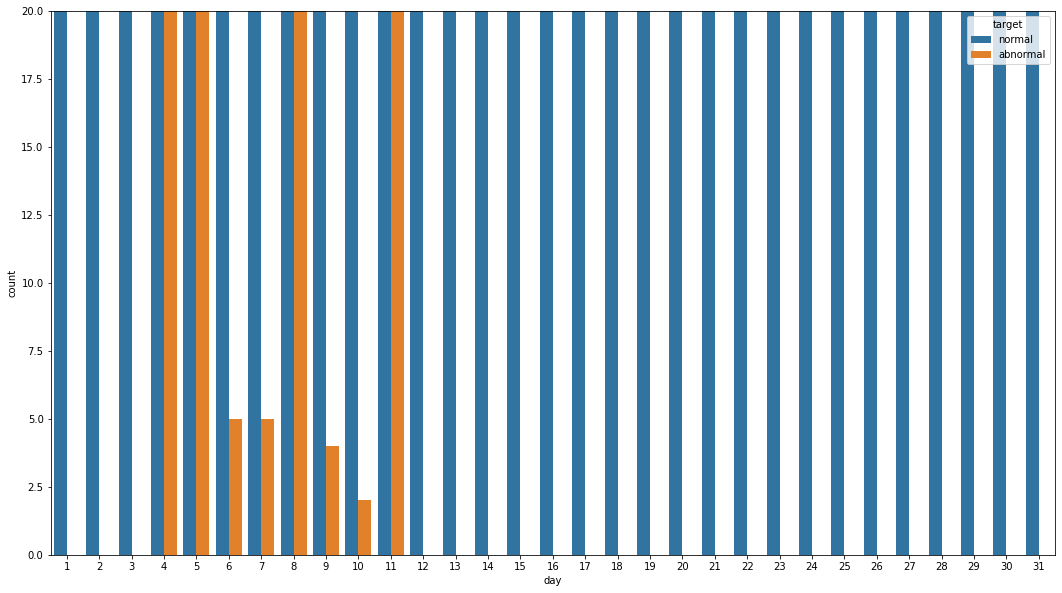

In [9]:
sns.countplot(x="day", data=data, hue="target")
plt.ylim(0,20)

(0.0, 20.0)

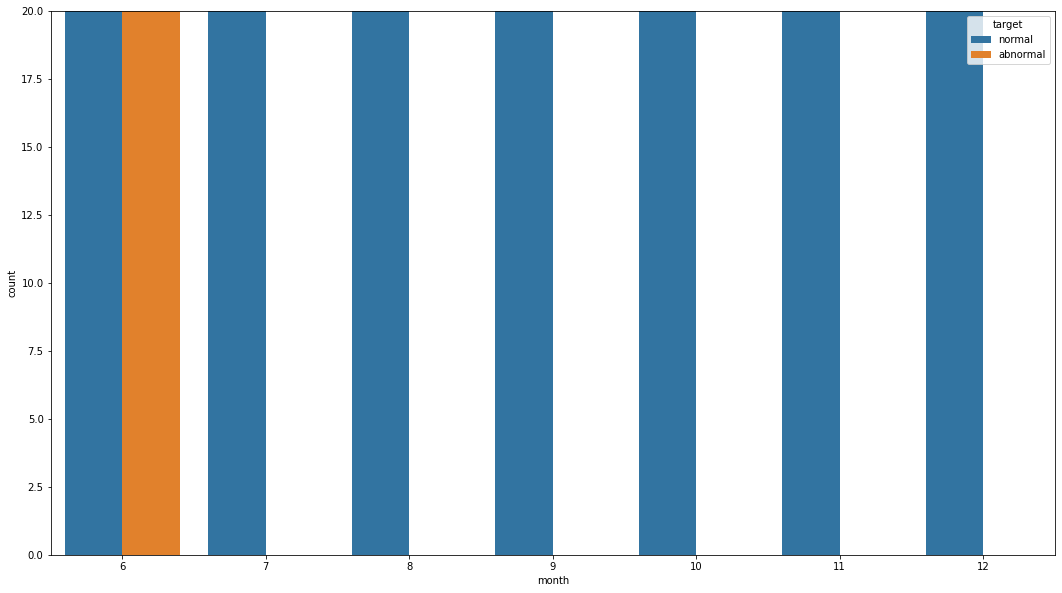

In [10]:
sns.countplot(x="month", data=data, hue="target")
plt.ylim(0,20)

(0.0, 20.0)

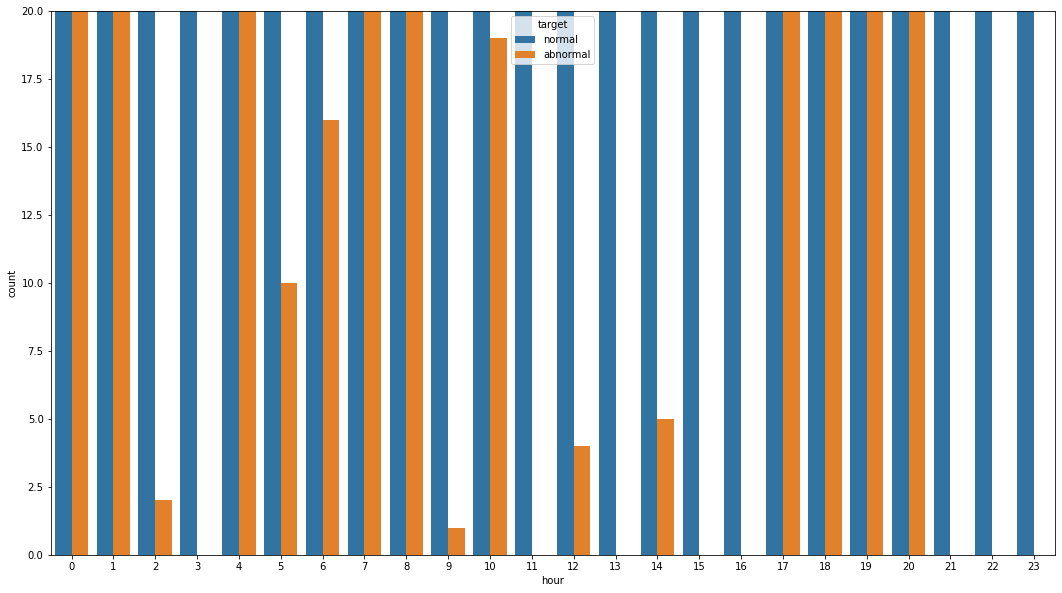

In [11]:
sns.countplot(x="hour", data=data, hue="target")
plt.ylim(0,20)

<AxesSubplot:xlabel='minute', ylabel='count'>

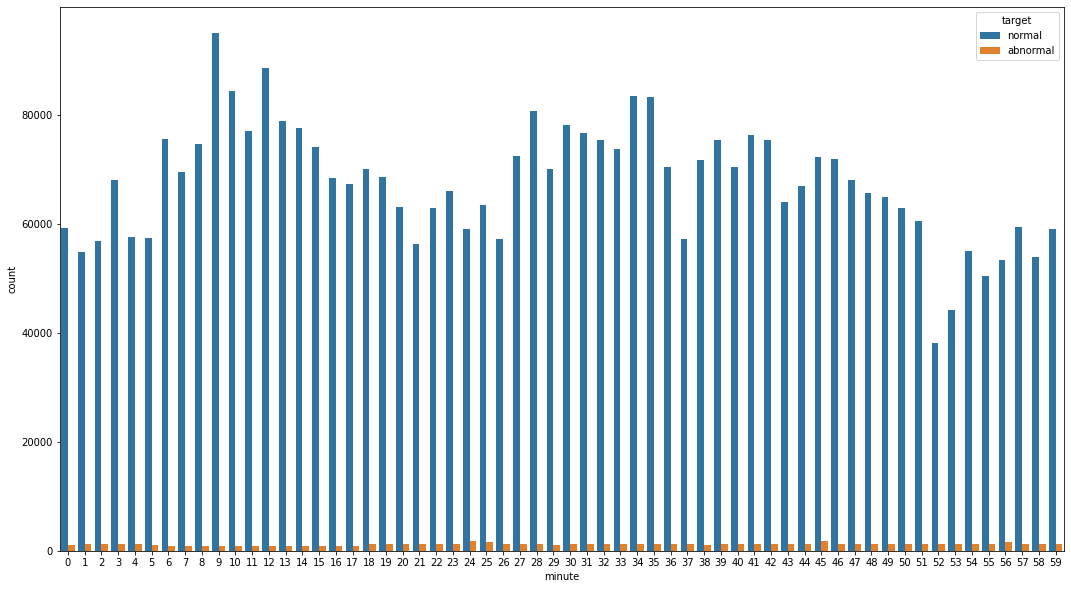

In [12]:
sns.countplot(x="minute", data=data, hue="target")
# plt.ylim(0,20)

<AxesSubplot:xlabel='second', ylabel='Density'>

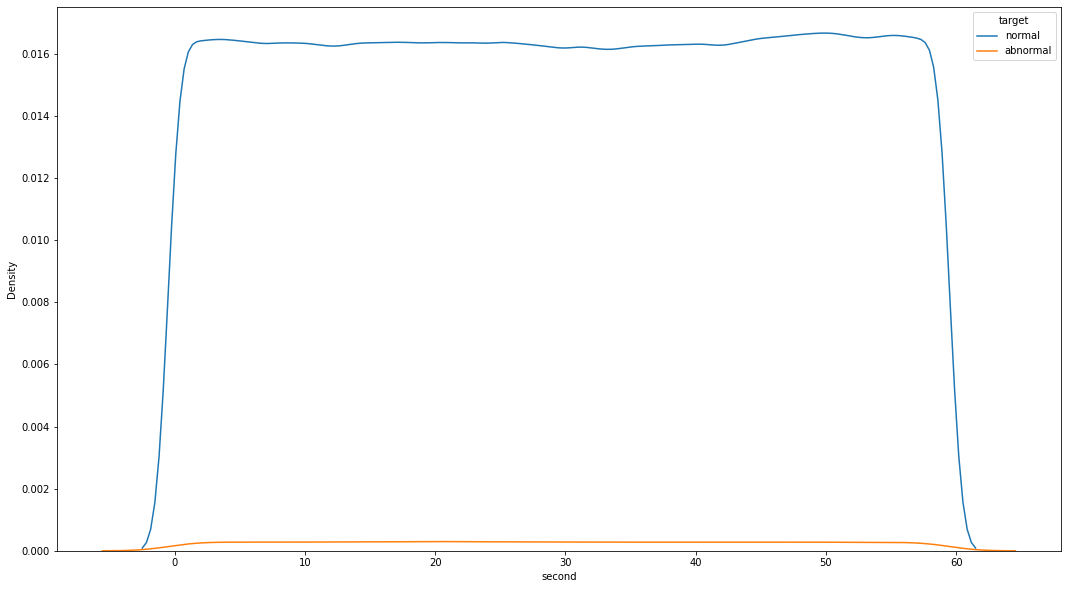

In [13]:
sns.kdeplot(x="second", data=data, hue="target")
# plt.ylim(0,20)

<AxesSubplot:xlabel='minute', ylabel='Density'>

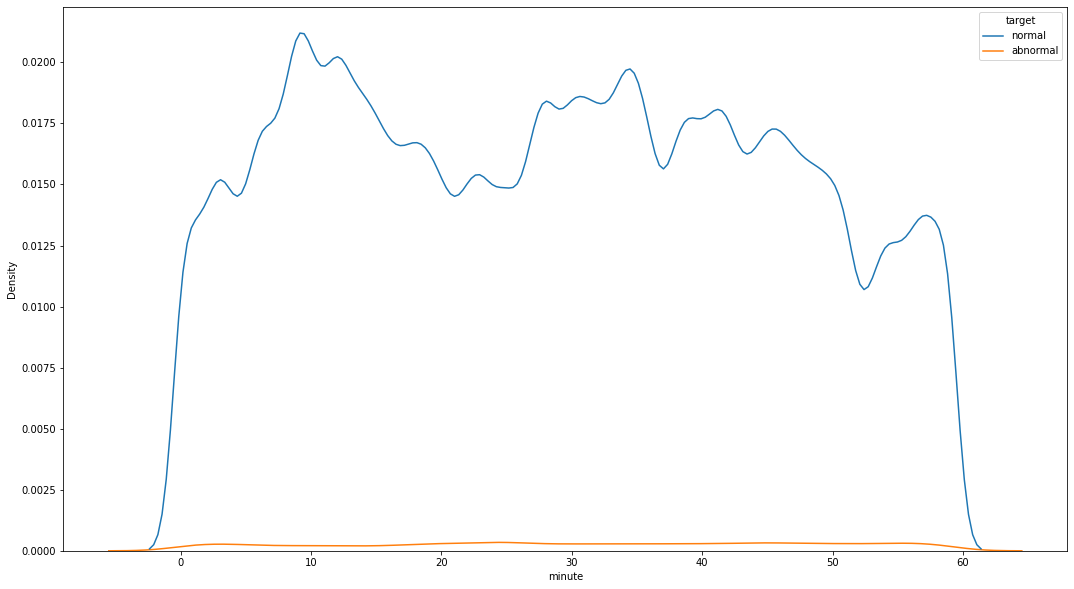

In [14]:
sns.kdeplot(x="minute", data=data, hue="target")

(0.0, 0.0005)

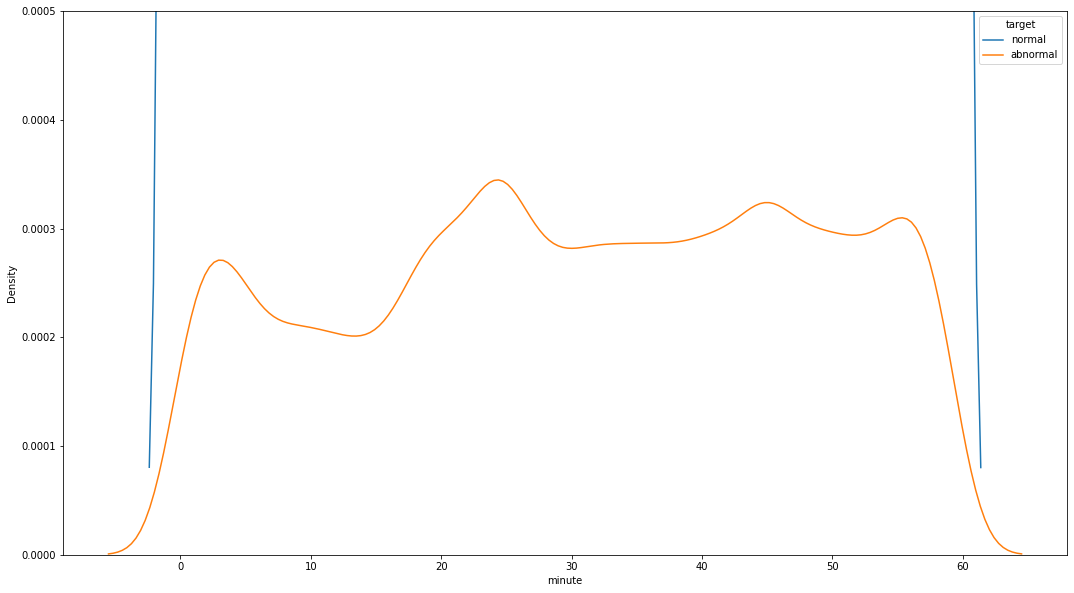

In [15]:
sns.kdeplot(x="minute", data=data, hue="target")
plt.ylim(0,0.0005)

<AxesSubplot:xlabel='microsecond', ylabel='Density'>

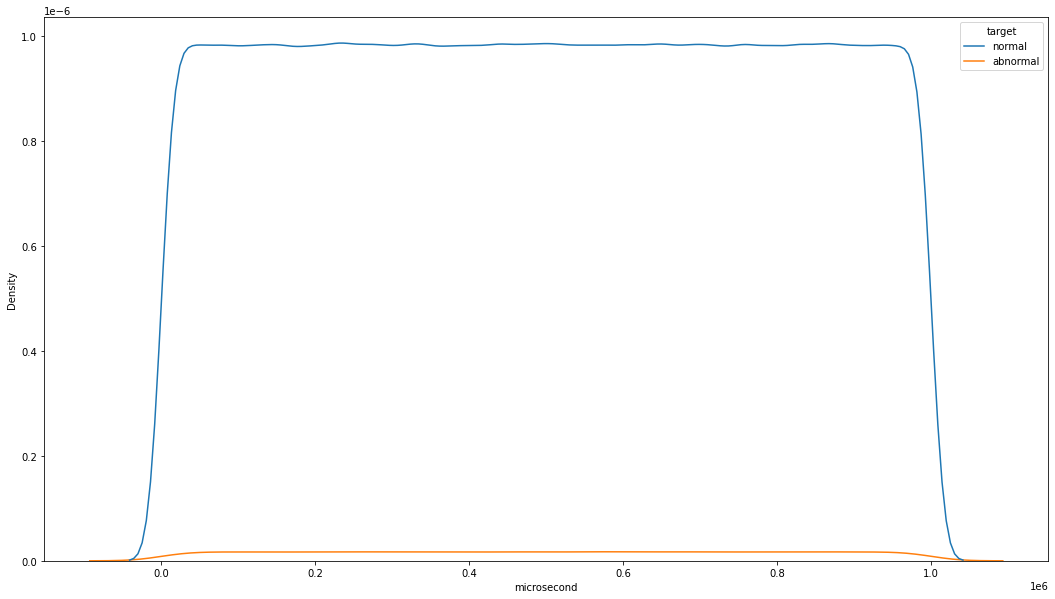

In [16]:
sns.kdeplot(x="microsecond", data=data, hue="target")

(0.0, 1e-07)

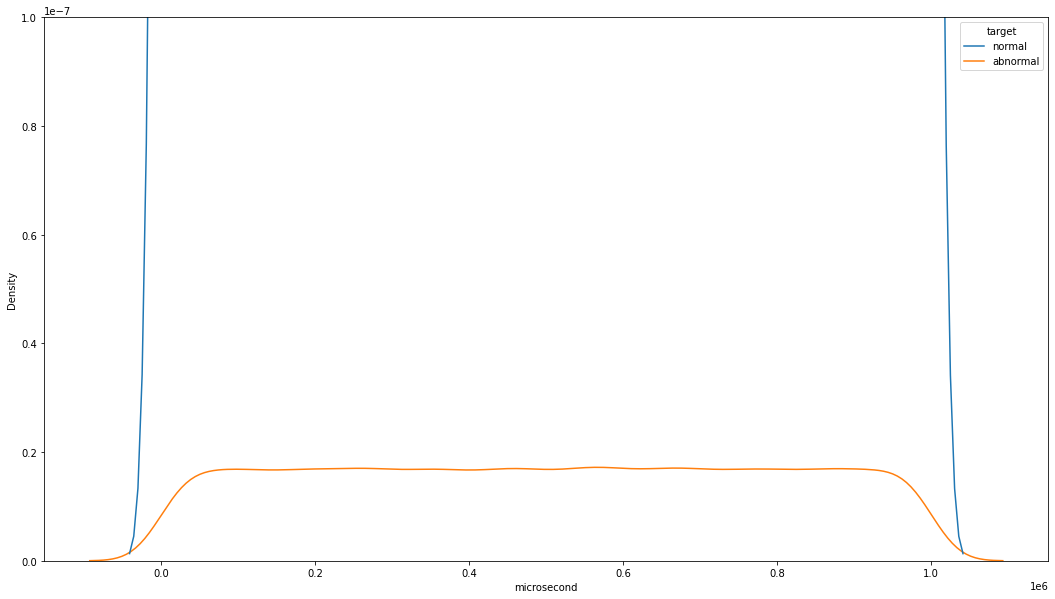

In [17]:
sns.kdeplot(x="microsecond", data=data, hue="target")
plt.ylim(0,0.1e-6)

In [18]:
data.head()

,target,time,log_code,message,year,month,day,hour,minute,second,microsecond
0,normal,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,363779
1,normal,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,527847
2,normal,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,675872
3,normal,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,823719
4,normal,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,982731


In [19]:
data["log_code"][0]

'R02-M1-N0-C:J12-U11'

In [20]:
data.dropna(inplace=True)

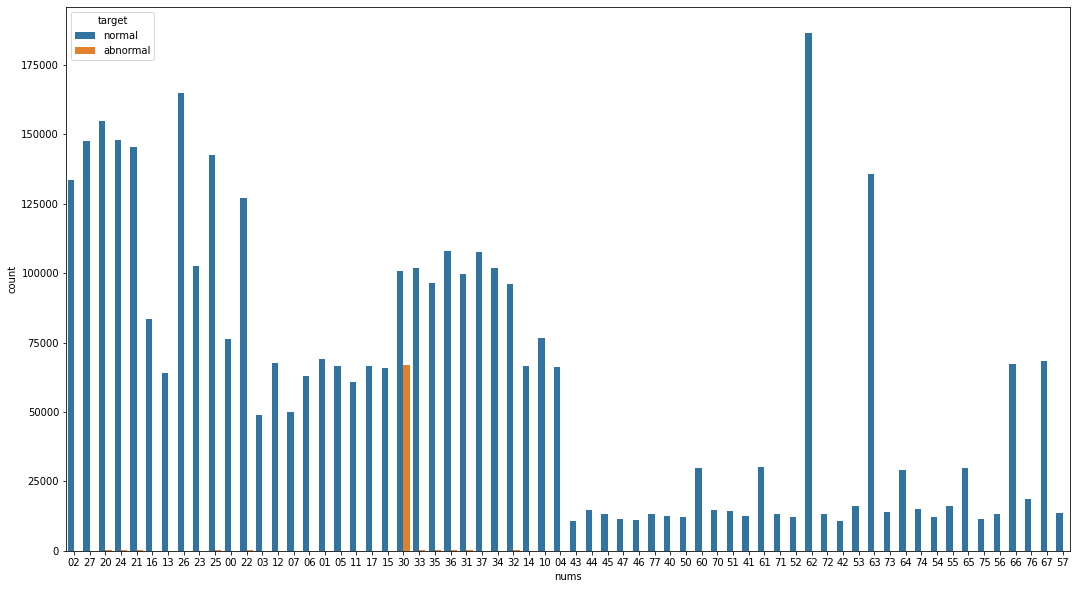

In [21]:


def get_code(row):
    regex = re.compile(r"\d{1,2}")
    try:
        groups = regex.search(row)
    except Exception as e:
        print(row)
        raise e
        
    if groups:
        return groups[0]
    return groups

get_code(data["log_code"][0])
data["nums"] = data["log_code"].apply(get_code)
sns.countplot(x="nums", data=data, hue="target")

c = data.groupby(["nums", "target"]).count().unstack(fill_value=0).stack()["time"]
c = c.reset_index()

In [22]:
get_code(data["log_code"][0])

'02'

In [23]:
data["nums"] = data["log_code"].apply(get_code)

<AxesSubplot:xlabel='nums', ylabel='count'>

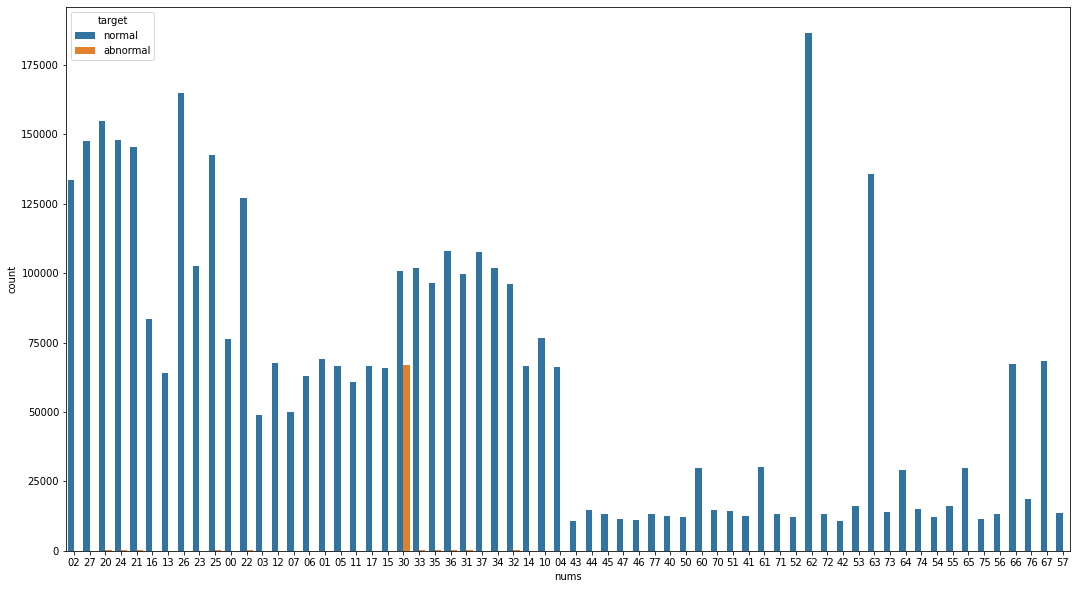

In [24]:
sns.countplot(x="nums", data=data, hue="target")


In [25]:
c = data.groupby(["nums", "target"]).count().unstack(fill_value=0).stack()["time"]
c = c.reset_index()

In [26]:
c = c.reset_index()
c

,index,nums,target,time
0,0,00,abnormal,64
1,1,00,normal,76144
2,2,01,abnormal,64
3,3,01,normal,68923
4,4,02,abnormal,64
...,...,...,...,...
123,123,75,normal,11610
124,124,76,abnormal,0
125,125,76,normal,18625
126,126,77,abnormal,0


In [27]:
nums = c["nums"].values
nums = np.unique(nums)

In [28]:
ratios = []
for i in range(len(c)):
    if not i%2:
        ratio = c.iloc[i]["time"]/c.iloc[i+1]["time"]
        ratios.append(ratio)

In [29]:
ratios_dict = {
    k:v for (k,v) in zip(nums, ratios)
}

In [30]:
def get_nums(row):
    return ratios_dict[row]

In [31]:
data["nums"] = data["nums"].apply(get_nums)

In [32]:
def get_code(row):
    str_to_return = ""
    for c in row:
        if c.isalpha():
            str_to_return+=c
    return str_to_return

print(get_code(data["log_code"][0]))

RMNCJU


In [33]:
data["alpha"] = data["log_code"].apply(get_code)

(0.0, 50.0)

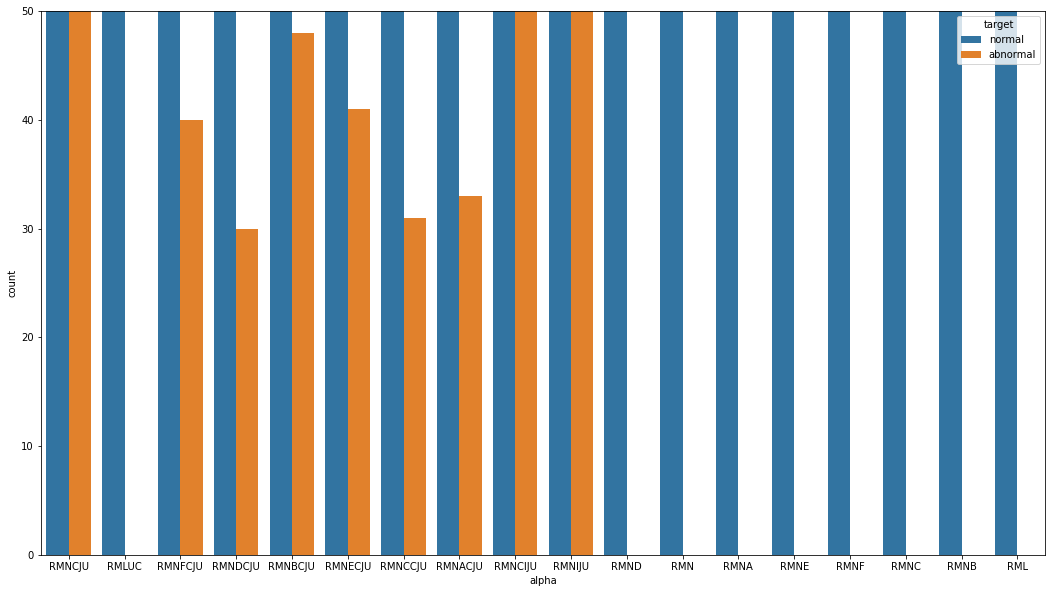

In [34]:
sns.countplot(x="alpha", data=data, hue="target")
plt.ylim(0,50)

In [35]:
c = data.groupby(["alpha", "target"]).count().unstack(fill_value=0).stack()["time"]
c = c.reset_index()
nums = c["alpha"].values
nums = np.unique(nums)

ratios = []
for i in range(len(c)):
    if not i%2:
        ratio = c.iloc[i]["time"]/c.iloc[i+1]["time"]
        ratios.append(ratio)
        
ratios_dict = {
    k:v for (k,v) in zip(nums, ratios)
}

def get_nums(row):
    return ratios_dict[row]



In [36]:
data["alpha"] =  data["alpha"].apply(get_nums)

In [37]:
data.head()

,target,time,log_code,message,year,month,day,hour,minute,second,microsecond,nums,alpha
0,normal,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,363779,0.000479,0.029706
1,normal,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,527847,0.000479,0.029706
2,normal,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,675872,0.000479,0.029706
3,normal,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,823719,0.000479,0.029706
4,normal,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...,2005,6,3,15,42,50,982731,0.000479,0.029706


In [38]:
data.drop(["log_code", "year", "second","microsecond"], inplace=True,  axis=1)

In [39]:
def replace_values(col):
    c = data.groupby([col, "target"]).count().unstack(fill_value=0).stack()["time"]
    c = c.reset_index()
    nums = c[col].values
    nums = np.unique(nums)
#     print(c)
    ratios = []
    for i in range(len(c)):
        if not i%2:
            ratio = c.iloc[i]["time"]/c.iloc[i+1]["time"]
            ratios.append(ratio)

    ratios_dict = {
        k:v for (k,v) in zip(nums, ratios)
    }

    def get_nums(row):
        return ratios_dict[row]

    return data[col].apply(get_nums)


In [40]:
data["day"] = replace_values("day")

In [41]:
data["month"] =  replace_values("month")

In [42]:
data["minute"] =  replace_values("minute")

In [43]:
data["hour"] =  replace_values("hour")

In [44]:
data.drop("time", axis=1, inplace=True)
data.head()

,target,message,month,day,hour,minute,nums,alpha
0,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706
1,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706
2,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706
3,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706
4,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706


In [45]:
def get_capital(row):
    regex = re.compile(r"([A-Z]{3,}\s){3}")
    groups = regex.search(row)
    if groups:
        return groups[0].strip()
    return None

In [46]:
data["capital"] = data["message"].apply(get_capital)

In [47]:
data.head()

,target,message,month,day,hour,minute,nums,alpha,capital
0,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO
1,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO
2,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO
3,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO
4,normal,RAS KERNEL INFO instruction cache parity error...,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO


In [48]:
def get_small(row):
    for i in range(len(row)):
        if row[i].upper() != row[i]:
            break
    try:
        ids = row.index(")")
    except ValueError:
        ids = len(row)
    return row[i:ids]

In [49]:
get_small(data["message"][0])

'instruction cache parity error corrected'

In [50]:
(data["message"].apply(get_small).value_counts().values<5).sum()

45584

In [51]:
data["small"] = data["message"].apply(get_small)

In [52]:
data.drop("message", axis=1, inplace=True)

In [53]:
data.head()

,target,month,day,hour,minute,nums,alpha,capital,small
0,normal,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO,instruction cache parity error corrected
1,normal,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO,instruction cache parity error corrected
2,normal,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO,instruction cache parity error corrected
3,normal,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO,instruction cache parity error corrected
4,normal,0.068621,0.0,0.0,0.016326,0.000479,0.029706,RAS KERNEL INFO,instruction cache parity error corrected


In [54]:
data.to_csv("final_data_for_training.csv", index = False)